In [2]:
install.packages("tuneR", repos='http://cran.r-project.org')

also installing the dependency ‘signal’




The downloaded binary packages are in
	/var/folders/b1/6r6n8ptx4r9cq1rvs075k7j00000gn/T//RtmpVZNATw/downloaded_packages


In [5]:
options(width=130)

suppressWarnings( library(dplyr) )
library(tibble)     # rownames_to_column
library(stringr)    # word
library(tools)      # md5sum
library(tuneR)      # readWave
suppressMessages( library(doParallel) )  # foreach 

dataDir <- "./input/"

In [6]:
trainFilenames <- list.files(path=paste0(dataDir, "train"), 
                             pattern="^.*\\.wav$",
                             recursive=TRUE, full.names=TRUE)

length(trainFilenames)
head(trainFilenames )

[1] 64727

[1] "./input/train/audio/_background_noise_/doing_the_dishes.wav" "./input/train/audio/_background_noise_/dude_miaowing.wav"   
[3] "./input/train/audio/_background_noise_/exercise_bike.wav"    "./input/train/audio/_background_noise_/pink_noise.wav"      
[5] "./input/train/audio/_background_noise_/running_tap.wav"      "./input/train/audio/_background_noise_/white_noise.wav"

- md5sum을 만들고 각 파일의 사운드 속성을 수집하십시오.
- 병렬 처리를 사용하여 md5sum 계산 속도를 높입니다. md5sum에 2 개의 코어를 제외한 모든 코어를 사용합시다.
- trainSoundInfo는 나중에 다양한 속성을 기반으로 wav 파일을 쉽게 선택할 수 있도록 파일에 기록됩니다.

In [77]:
sww <- tuneR::readWave('./input/train/audio/_background_noise_/doing_the_dishes.wav')

In [81]:
sww_left = sww@left

In [85]:
length(sww_left)

[1] 1522930

In [106]:
sww_left[500:1000]

[1]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
 [21]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
 [41]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
 [61]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
 [81]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
[101]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
[121]     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
[141]     0    -1     2     4     8    17    20    38    49    55    55    -8  -235 -1368  -717  -259  -689  -338  -102    86
[161]   155  -327  -398   874  1076    86  -718  -514   182  1463  1679  1016  1273   805  -729  -735   -13    39  -384  -663
[181] -1390 -1030  -192    73   383   775   618   607   416  -158  -381    75   768  1154  1302   319   831   623   -97    -3
[201]  -765 -1343 -1565 -1925  -800   268   502   163  -493  -547   -76   894  1226   880   812   389    50 -1733  -624   245
[221]   635   298  -118 -1307 -1043  -798   192  1098   878   -29  -184 -1543 -1032  -935     4   438   379   304  1100  1064
[241]  1038   446  -216  -588  -491   479   922   535  -269  -387  -441 -1152  -467  -410  -121  -698  -944  -588   -22  -173
[261]   -42  -178 -1094 -1101  -379    31  -381   252  1656  1870  1379  1010   793   659   -67  -675  -966 -1028 -1234  -985
[281]    32  -224   637  -502   134   331    98  -657   499   423  -200    35   638  -129    62   215   279   578   463   752
[301]   284   -64  -691  -889 -1368 -1790 -1479  -737  -664  -336  -132  1104  1953  1185   506   149   925   943  1035  1281
[321]   311   511   394  -556  -466   157   665  -261 -1129 -1046  -804  -678  -490  -910  -615  -313   -43    33  -503    37
[341]   563  1532  1321  1444  1535  1413  1740   861   841    85  -950 -1000  -310   -70  -313 -2084 -1459   -26   534   -49
[361]  -129  -226  -603  -682  -837  -254   380  1291   995  -293   -95   123  1052  1605  1337   193   382   345   129   -30
[381]   -14   404  -465  -901 -1393 -1737 -1204 -1152  -631  1193  1254   916   184  -123  -267   234    32     0   -47   499
[401]   296   624  -261  -330   295   535  -112 -1589 -1858 -1568 -1133  -937   552   533  1536  1483    89   491  -980 -1227
[421] -1076  -134   321  -217   519   398    80   602   280 -1261 -1846   -10  1161  2812  1386  -238    67  -737  -208   -91
[441]   -91  -111  -268  -152  -603  -697  -203   704   610  -111   312   566  -608 -2002 -2120  -848  1260  1657   684  -191
[461]  -947  -986  -243   228  1307  1145  1318  1612   721 -1431 -2006 -1621 -1035 -1155  -378   174  1870  1980   628   -38
[481] -1108 -1196  -505   350  -134  -239  -743   100  -289   456   990   653  -118    87   131   368  -615  -512  -189  -609
[501]  -427

In [89]:
summary(sww_left)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-30800.000   -581.000      0.000     -0.557    579.000  28690.000 

In [91]:
sww_samp = sww@samp.rate

In [92]:
length(sww_samp)

[1] 1

In [95]:
str(sww)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1522930] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : num(0) 
  ..@ stereo   : logi FALSE
  ..@ samp.rate: int 16000
  ..@ bit      : int 16
  ..@ pcm      : logi TRUE


In [96]:
testsound <- normalize(sine(400) + sine(1000) + square(250), "16")
m1 <- melfcc(testsound)

Warning message in normalize(sine(400) + sine(1000) + square(250), "16"):
“pcm set to TRUE since unit was one of 8, 16, or 24”

In [99]:
dim(m1)

[1] 98 12

In [100]:
m2 <- melfcc(testsound, numcep=9, usecmp=TRUE, modelorder=8, 
    spec_out=TRUE, frames_in_rows=FALSE)

Warning message in melfcc(testsound, numcep = 9, usecmp = TRUE, modelorder = 8, :
“PLP cepstra are implicitly dcttype 1”

In [103]:
str(m2)

List of 4
 $ cepstra  : num [1:9, 1:98] 5.779 -0.209 -0.111 -0.145 -0.274 ...
 $ aspectrum: num [1:40, 1:98] 59.9 59.9 150.5 257.7 182.2 ...
 $ pspectrum: num [1:1024, 1:98] 3120713 2024531 5163007 814059 2951425 ...
 $ lpcas    : num [1:9, 1:98] 0.003091 0.000647 0.000295 0.000284 0.000431 ...


In [7]:
cluster <- makePSOCKcluster(detectCores() - 2)
registerDoParallel(cluster)   

trainSoundInfo <- foreach(i = 1:length(trainFilenames), .combine=rbind) %dopar%
{    
    soundWave <- tuneR::readWave(trainFilenames[i])
    
    q <- quantile(soundWave@left, c(0.0, 0.10, 0.25, 0.50, 0.75, 0.90, 1.0))
    
    data.frame(
           filename          = trainFilenames[i],          
           samples           = length(soundWave@left),
           durationSeconds   = length(soundWave@left) / soundWave@samp.rate,
           samplingRateHertz = soundWave@samp.rate,
           channels          = ifelse(soundWave@stereo, "Stero", "Mono"),
           pcmIntFormat      = soundWave@pcm,
           bitsPerSample     = soundWave@bit,
        
           # Waveform stats
           min               = q[1],   # Quantiles
           Q10               = q[2],
           Q25               = q[3],
           median            = q[4],
           Q75               = q[5],
           Q90               = q[6],        
           max               = q[7],
        
           range             = q[7] - q[1],
        
           mean              = mean(soundWave@left),
           sd                = sd(soundWave@left),
        
           md5sum            = tools::md5sum(trainFilenames[i]),
        
           row.names         = NULL,
           stringsAsFactors  = FALSE)
}

stopCluster(cluster)

In [8]:
dim(trainSoundInfo)

[1] 64727    18

In [9]:
head(trainSoundInfo)

filename,samples,durationSeconds,samplingRateHertz,channels,pcmIntFormat,bitsPerSample,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
./input/train/audio/_background_noise_/doing_the_dishes.wav,1522930,95.18313,16000,Mono,TRUE,16,-30799,-1231,-581,0,579,1229.0,28691,59490,-0.5568417,1225.4289,46b9fdb606f7e10134f567c6188a0f6b
./input/train/audio/_background_noise_/dude_miaowing.wav,988891,61.80569,16000,Mono,TRUE,16,-27328,-80,-35,0,34,79.0,24634,51962,-0.5378894,130.2342,0456f209fe1c91ef5f30dbc0614bc802
./input/train/audio/_background_noise_/exercise_bike.wav,980062,61.25388,16000,Mono,TRUE,16,-8241,-913,-471,0,473,915.0,7814,16055,-0.2269754,764.4815,b7540362e57a9b700e65eb8788377252
./input/train/audio/_background_noise_/pink_noise.wav,960000,60.00000,16000,Mono,TRUE,16,-32767,-14937,-8324,-959,6368,12991.0,32767,65534,-971.1024781,10856.9951,b93373da9482ffd1752159b64079475d
./input/train/audio/_background_noise_/running_tap.wav,978488,61.15550,16000,Mono,TRUE,16,-28743,-2738,-1415,0,1412,2743.0,23401,52144,-1.1677772,2242.0480,8ef038c5a21d9062a662c3b1f03afba0
./input/train/audio/_background_noise_/white_noise.wav,960000,60.00000,16000,Mono,TRUE,16,-32767,-14033,-7381,1,7364,14017.1,32767,65534,-0.6069031,10908.6717,990d31f1551998e2f7fdb77fff4fab6b


In [11]:
table(trainSoundInfo$samplingRateHertz)


16000 
64727 

In [12]:
table(trainSoundInfo$channels)


 Mono 
64727 

In [14]:
table(trainSoundInfo$pcmIntFormat)


 TRUE 
64727 

In [15]:
table(trainSoundInfo$bitsPerSample)


   16 
64727 

In [16]:
trainSoundInfo <- trainSoundInfo %>% select(filename, samples, 
                                            min, Q10, Q25, median, Q75, Q90, max, range,
                                            mean, sd,
                                            md5sum)
head(trainSoundInfo)

filename,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
./input/train/audio/_background_noise_/doing_the_dishes.wav,1522930,-30799,-1231,-581,0,579,1229.0,28691,59490,-0.5568417,1225.4289,46b9fdb606f7e10134f567c6188a0f6b
./input/train/audio/_background_noise_/dude_miaowing.wav,988891,-27328,-80,-35,0,34,79.0,24634,51962,-0.5378894,130.2342,0456f209fe1c91ef5f30dbc0614bc802
./input/train/audio/_background_noise_/exercise_bike.wav,980062,-8241,-913,-471,0,473,915.0,7814,16055,-0.2269754,764.4815,b7540362e57a9b700e65eb8788377252
./input/train/audio/_background_noise_/pink_noise.wav,960000,-32767,-14937,-8324,-959,6368,12991.0,32767,65534,-971.1024781,10856.9951,b93373da9482ffd1752159b64079475d
./input/train/audio/_background_noise_/running_tap.wav,978488,-28743,-2738,-1415,0,1412,2743.0,23401,52144,-1.1677772,2242.0480,8ef038c5a21d9062a662c3b1f03afba0
./input/train/audio/_background_noise_/white_noise.wav,960000,-32767,-14033,-7381,1,7364,14017.1,32767,65534,-0.6069031,10908.6717,990d31f1551998e2f7fdb77fff4fab6b


In [17]:
fivenum(trainSoundInfo$samples)

[1]    5945   16000   16000   16000 1522930

In [18]:
sum(trainSoundInfo$samples == 16000)

[1] 58252

In [19]:
sum(trainSoundInfo$samples == 16000) / nrow(trainSoundInfo)

[1] 0.8999645

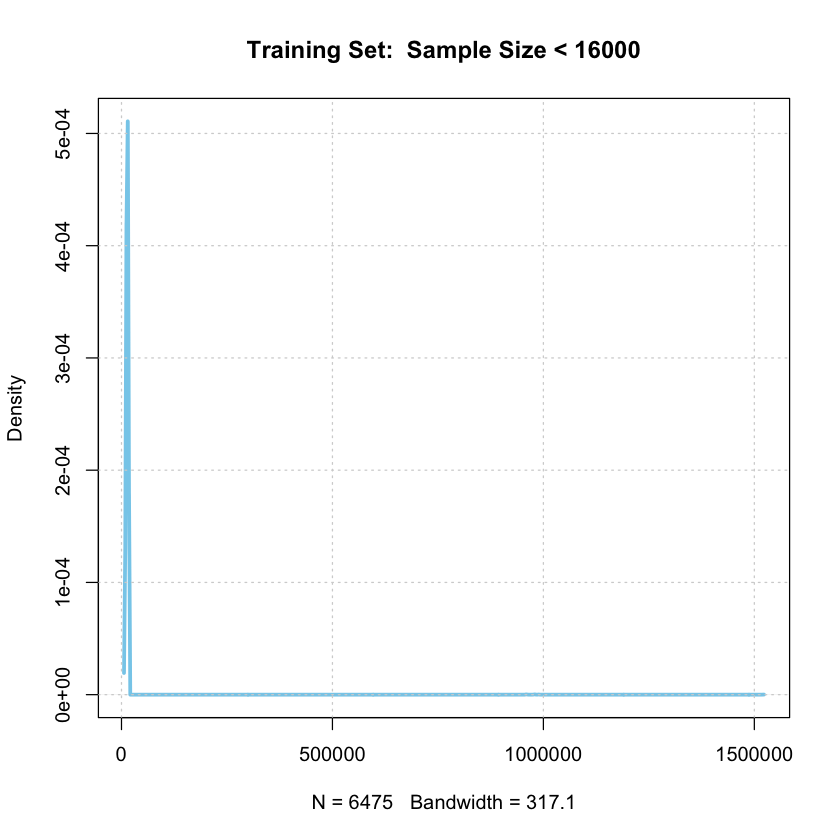

In [20]:
notOneSecond <- trainSoundInfo$samples[trainSoundInfo$samples != 16000]
plot(density(notOneSecond, from=min(notOneSecond), to=max(notOneSecond)),     
    col="skyblue", lwd=3,
    main="Training Set:  Sample Size < 16000")
grid()

In [21]:
trainFileInfo <- file.info(trainFilenames, extra_cols=FALSE) %>%
                 rownames_to_column(var="filename")          %>%
                 select(filename, size)                      %>%
                 rename(sizeBytes=size)
head(trainFileInfo)

filename,sizeBytes
./input/train/audio/_background_noise_/doing_the_dishes.wav,3045984
./input/train/audio/_background_noise_/dude_miaowing.wav,1977906
./input/train/audio/_background_noise_/exercise_bike.wav,1960248
./input/train/audio/_background_noise_/pink_noise.wav,1920044
./input/train/audio/_background_noise_/running_tap.wav,1957100
./input/train/audio/_background_noise_/white_noise.wav,1920044


In [22]:
trainInfo <- inner_join(trainFileInfo, trainSoundInfo, by="filename")

In [23]:
head(trainInfo)

filename,sizeBytes,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
./input/train/audio/_background_noise_/doing_the_dishes.wav,3045984,1522930,-30799,-1231,-581,0,579,1229.0,28691,59490,-0.5568417,1225.4289,46b9fdb606f7e10134f567c6188a0f6b
./input/train/audio/_background_noise_/dude_miaowing.wav,1977906,988891,-27328,-80,-35,0,34,79.0,24634,51962,-0.5378894,130.2342,0456f209fe1c91ef5f30dbc0614bc802
./input/train/audio/_background_noise_/exercise_bike.wav,1960248,980062,-8241,-913,-471,0,473,915.0,7814,16055,-0.2269754,764.4815,b7540362e57a9b700e65eb8788377252
./input/train/audio/_background_noise_/pink_noise.wav,1920044,960000,-32767,-14937,-8324,-959,6368,12991.0,32767,65534,-971.1024781,10856.9951,b93373da9482ffd1752159b64079475d
./input/train/audio/_background_noise_/running_tap.wav,1957100,978488,-28743,-2738,-1415,0,1412,2743.0,23401,52144,-1.1677772,2242.0480,8ef038c5a21d9062a662c3b1f03afba0
./input/train/audio/_background_noise_/white_noise.wav,1920044,960000,-32767,-14033,-7381,1,7364,14017.1,32767,65534,-0.6069031,10908.6717,990d31f1551998e2f7fdb77fff4fab6b


In [25]:
trainInfo$filename <- substr(trainInfo$filename, nchar(dataDir)+1, nchar(trainInfo$filename))

In [26]:
head(trainInfo)

filename,sizeBytes,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
train/audio/_background_noise_/doing_the_dishes.wav,3045984,1522930,-30799,-1231,-581,0,579,1229.0,28691,59490,-0.5568417,1225.4289,46b9fdb606f7e10134f567c6188a0f6b
train/audio/_background_noise_/dude_miaowing.wav,1977906,988891,-27328,-80,-35,0,34,79.0,24634,51962,-0.5378894,130.2342,0456f209fe1c91ef5f30dbc0614bc802
train/audio/_background_noise_/exercise_bike.wav,1960248,980062,-8241,-913,-471,0,473,915.0,7814,16055,-0.2269754,764.4815,b7540362e57a9b700e65eb8788377252
train/audio/_background_noise_/pink_noise.wav,1920044,960000,-32767,-14937,-8324,-959,6368,12991.0,32767,65534,-971.1024781,10856.9951,b93373da9482ffd1752159b64079475d
train/audio/_background_noise_/running_tap.wav,1957100,978488,-28743,-2738,-1415,0,1412,2743.0,23401,52144,-1.1677772,2242.0480,8ef038c5a21d9062a662c3b1f03afba0
train/audio/_background_noise_/white_noise.wav,1920044,960000,-32767,-14033,-7381,1,7364,14017.1,32767,65534,-0.6069031,10908.6717,990d31f1551998e2f7fdb77fff4fab6b


In [27]:
splits <- strsplit(trainInfo$filename, "/|_|\\.")
length(splits)

[1] 64727

In [28]:
x = splits[[1]]
x

[1] "train"      "audio"      ""           "background" "noise"      ""           "doing"      "the"        "dishes"    
[10] "wav"

In [29]:
data.frame(dataset=x[1], word=x[3], speakerID=x[4], utteranceIndex=x[6], extension=x[7], stringsAsFactors=FALSE)

dataset,word,speakerID,utteranceIndex,extension
train,,background,,doing


In [30]:
fileAttributes <- do.call(rbind, 
                          lapply(splits, function(x){
                                 data.frame(dataset=x[1], 
                                 word=x[3], 
                                 speakerID=x[4], 
                                 utteranceIndex=x[6], 
                                 extension=x[7], 
                                 stringsAsFactors=FALSE)
                 }))
head(fileAttributes)

dataset,word,speakerID,utteranceIndex,extension
train,,background,,doing
train,,background,,dude
train,,background,,exercise
train,,background,,pink
train,,background,,running
train,,background,,white


In [31]:
trainInfo <- cbind(trainInfo, fileAttributes) %>% 
    select(filename, dataset, word, speakerID, utteranceIndex, extension, samples, 
           min, Q10, Q25, median, Q75, Q90, max, range, mean, sd,
           md5sum)

In [32]:
dim(trainInfo)

[1] 64727    18

In [104]:
head(trainInfo, 100)

filename,dataset,word,speakerID,utteranceIndex,extension,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
train/audio/_background_noise_/doing_the_dishes.wav,train,,background,,doing,1522930,-30799,-1231.0,-581.00,0,579,1229.0,28691,59490,-0.5568417,1225.4289,46b9fdb606f7e10134f567c6188a0f6b
train/audio/_background_noise_/dude_miaowing.wav,train,,background,,dude,988891,-27328,-80.0,-35.00,0,34,79.0,24634,51962,-0.5378894,130.2342,0456f209fe1c91ef5f30dbc0614bc802
train/audio/_background_noise_/exercise_bike.wav,train,,background,,exercise,980062,-8241,-913.0,-471.00,0,473,915.0,7814,16055,-0.2269754,764.4815,b7540362e57a9b700e65eb8788377252
train/audio/_background_noise_/pink_noise.wav,train,,background,,pink,960000,-32767,-14937.0,-8324.00,-959,6368,12991.0,32767,65534,-971.1024781,10856.9951,b93373da9482ffd1752159b64079475d
train/audio/_background_noise_/running_tap.wav,train,,background,,running,978488,-28743,-2738.0,-1415.00,0,1412,2743.0,23401,52144,-1.1677772,2242.0480,8ef038c5a21d9062a662c3b1f03afba0
train/audio/_background_noise_/white_noise.wav,train,,background,,white,960000,-32767,-14033.0,-7381.00,1,7364,14017.1,32767,65534,-0.6069031,10908.6717,990d31f1551998e2f7fdb77fff4fab6b
train/audio/bed/00176480_nohash_0.wav,train,bed,00176480,0,wav,16000,-16039,-1767.4,-18.00,0,11,337.0,24735,40774,-1.0628750,3043.4817,3336677cade31ae52d0f9e6288ad679d
train/audio/bed/004ae714_nohash_0.wav,train,bed,004ae714,0,wav,16000,-11421,-558.0,-149.00,-100,-50,285.1,12740,24161,-95.1914375,1220.9112,6ea166114fb6b1466c06e6cf0d88aa8d
train/audio/bed/004ae714_nohash_1.wav,train,bed,004ae714,1,wav,14861,-5797,-368.0,-143.00,-99,-53,136.0,7021,12818,-95.1184981,601.7973,1f68560e13cc793a24b7534c13c1f7e9
train/audio/bed/00f0204f_nohash_0.wav,train,bed,00f0204f,0,wav,16000,-2474,-322.1,-43.00,-1,34,218.1,2327,4801,0.0856875,373.0592,fac98e7ea4e2f6f71814410d05d717cd


In [34]:
write.csv(trainInfo, "train-Kaggle-Speech-Recognition-File-Inventory.csv", row.names=FALSE)

In [35]:
length(unique(trainInfo$speakerID))

[1] 1882

In [36]:
wordUtteranceCounts <- as.data.frame.matrix( table(trainInfo$word, as.numeric(trainInfo$utteranceIndex)) )
wordUtteranceCounts <- cbind(wordUtteranceCounts, Total=apply(wordUtteranceCounts, 1, sum))
wordUtteranceCounts

,0,1,2,3,4,5,6,7,8,9,10,11,Total
,0,0,0,0,0,0,0,0,0,0,0,0,0
bed,1177,411,99,21,4,1,0,0,0,0,0,0,1713
bird,1194,410,109,17,1,0,0,0,0,0,0,0,1731
cat,1180,413,111,27,2,0,0,0,0,0,0,0,1733
dog,1209,417,101,15,4,0,0,0,0,0,0,0,1746
down,1206,567,257,168,149,5,3,3,1,0,0,0,2359
eight,1179,561,276,173,150,8,3,1,1,0,0,0,2352
five,1181,571,272,173,149,6,4,1,0,0,0,0,2357
four,1194,586,260,169,148,8,3,2,1,1,0,0,2372
go,1182,574,271,170,152,10,7,4,1,1,0,0,2372


In [37]:
testFilenames <- list.files(path=paste0(dataDir, "test"), 
                            pattern="^.*\\.wav$",
                            recursive=TRUE, full.names=TRUE)

length(testFilenames)
head(testFilenames)

[1] 158538

[1] "./input/test/audio/clip_000044442.wav" "./input/test/audio/clip_0000adecb.wav" "./input/test/audio/clip_0000d4322.wav"
[4] "./input/test/audio/clip_0000fb6fe.wav" "./input/test/audio/clip_0001d1559.wav" "./input/test/audio/clip_0002256ed.wav"

In [38]:
cluster <- makePSOCKcluster(detectCores() - 2)
registerDoParallel(cluster)   

testSoundInfo <- foreach(i = 1:length(testFilenames), .combine=rbind) %dopar%
{    
    soundWave <- tuneR::readWave(testFilenames[i])
    
    q <- quantile(soundWave@left, c(0.0, 0.10, 0.25, 0.50, 0.75, 0.90, 1.0))  
    
    data.frame(
           filename          = testFilenames[i],          
           samples           = length(soundWave@left),
           durationSeconds   = length(soundWave@left) / soundWave@samp.rate,
           samplingRateHertz = soundWave@samp.rate,
           channels          = ifelse(soundWave@stereo, "Stero", "Mono"),
           pcmIntFormat      = soundWave@pcm,
           bitsPerSample     = soundWave@bit,
        
           # Waveform stats
           min               = q[1],   # Quantiles
           Q10               = q[2],
           Q25               = q[3],
           median            = q[4],
           Q75               = q[5],
           Q90               = q[6],
           max               = q[7],

           range             = q[7] - q[1],

           mean              = mean(soundWave@left),
           sd                = sd(soundWave@left),                                                     
        
           md5sum            = tools::md5sum(testFilenames[i]),
        
           row.names         = NULL,
           stringsAsFactors  = FALSE)
}

stopCluster(cluster)

In [39]:
dim(testSoundInfo)

[1] 158538     18

In [40]:
head(testSoundInfo)

filename,samples,durationSeconds,samplingRateHertz,channels,pcmIntFormat,bitsPerSample,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
./input/test/audio/clip_000044442.wav,16000,1,16000,Mono,TRUE,16,-19364,-1187.6,-113.00,6,128,2612.6,11836,31200,-11.9253750,3110.6630,2fdd0b20ce292dd241731997644480f3
./input/test/audio/clip_0000adecb.wav,16000,1,16000,Mono,TRUE,16,-7783,-492.1,-29.00,0,26,390.0,11594,19377,-0.2610625,885.3153,d950098ef59227be68c5168fb116c401
./input/test/audio/clip_0000d4322.wav,16000,1,16000,Mono,TRUE,16,-10175,-2030.2,-569.25,-3,118,1983.2,14092,24267,0.0138125,2052.8181,6df124df1eaa7f24cd76d30c80190c38
./input/test/audio/clip_0000fb6fe.wav,16000,1,16000,Mono,TRUE,16,-2748,-96.0,-45.00,2,46,92.0,2775,5523,-0.6893750,193.1339,dc6083b93c227585a531d2414c42cd84
./input/test/audio/clip_0001d1559.wav,16000,1,16000,Mono,TRUE,16,-20120,-4109.2,-256.00,-1,217,4175.0,21861,41981,-4.1986250,4206.9926,eb966b44bf6cde8b8f31156900cb22a7
./input/test/audio/clip_0002256ed.wav,16000,1,16000,Mono,TRUE,16,-5786,-1182.1,-53.00,2,252,1163.1,4440,10226,2.3092500,1124.2620,3e1c2b8e9d8e9f24d26e6b1a82b8b634


In [41]:
table(testSoundInfo$samplingRateHertz)


 16000 
158538 

In [44]:
table(testSoundInfo$channels)


  Mono 
158538 

In [43]:
table(testSoundInfo$pcmIntFormat)


  TRUE 
158538 

In [45]:
table(testSoundInfo$bitsPerSample)


    16 
158538 

In [46]:
testSoundInfo <- testSoundInfo %>% select(-samplingRateHertz, -channels, -pcmIntFormat, -bitsPerSample)

In [47]:
head(testSoundInfo)

filename,samples,durationSeconds,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
./input/test/audio/clip_000044442.wav,16000,1,-19364,-1187.6,-113.00,6,128,2612.6,11836,31200,-11.9253750,3110.6630,2fdd0b20ce292dd241731997644480f3
./input/test/audio/clip_0000adecb.wav,16000,1,-7783,-492.1,-29.00,0,26,390.0,11594,19377,-0.2610625,885.3153,d950098ef59227be68c5168fb116c401
./input/test/audio/clip_0000d4322.wav,16000,1,-10175,-2030.2,-569.25,-3,118,1983.2,14092,24267,0.0138125,2052.8181,6df124df1eaa7f24cd76d30c80190c38
./input/test/audio/clip_0000fb6fe.wav,16000,1,-2748,-96.0,-45.00,2,46,92.0,2775,5523,-0.6893750,193.1339,dc6083b93c227585a531d2414c42cd84
./input/test/audio/clip_0001d1559.wav,16000,1,-20120,-4109.2,-256.00,-1,217,4175.0,21861,41981,-4.1986250,4206.9926,eb966b44bf6cde8b8f31156900cb22a7
./input/test/audio/clip_0002256ed.wav,16000,1,-5786,-1182.1,-53.00,2,252,1163.1,4440,10226,2.3092500,1124.2620,3e1c2b8e9d8e9f24d26e6b1a82b8b634


In [48]:
fivenum(testSoundInfo$samples)
table(testSoundInfo$samples)

[1] 16000 16000 16000 16000 16000


 16000 
158538 

In [49]:
testFileInfo <- file.info(testFilenames, extra_cols=FALSE)     %>%
                          rownames_to_column(var="filename")   %>%
                          select(filename, size)               %>%
                          rename(sizeBytes=size)
head(testFileInfo)

filename,sizeBytes
./input/test/audio/clip_000044442.wav,32044
./input/test/audio/clip_0000adecb.wav,32044
./input/test/audio/clip_0000d4322.wav,32044
./input/test/audio/clip_0000fb6fe.wav,32044
./input/test/audio/clip_0001d1559.wav,32044
./input/test/audio/clip_0002256ed.wav,32044


In [50]:
testSoundInfo$filename <- substr(testSoundInfo$filename, nchar(dataDir)+1, nchar(testSoundInfo$filename))

In [51]:
splits <- strsplit(testSoundInfo$filename, "/|_|\\.")
length(splits)

[1] 158538

In [52]:
splits[[1]]

[1] "test"      "audio"     "clip"      "000044442" "wav"

In [53]:
fileAttributes <- do.call(rbind, 
                          lapply(splits, function(x){
                                 data.frame(dataset=x[1], 
                                 speakerID=x[4], 
                                 extension=x[5], 
                                 stringsAsFactors=FALSE)
                 }))
head(fileAttributes)

dataset,speakerID,extension
test,000044442,wav
test,0000adecb,wav
test,0000d4322,wav
test,0000fb6fe,wav
test,0001d1559,wav
test,0002256ed,wav


In [54]:
testInfo <- cbind(testSoundInfo, fileAttributes) %>%
            select(filename, dataset, speakerID, extension, samples, 
                   min, Q10, Q25, median, Q75, Q90, max, range, mean, sd,
                   md5sum)

In [55]:
dim(testInfo)

[1] 158538     16

In [56]:
head(testInfo)

filename,dataset,speakerID,extension,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
test/audio/clip_000044442.wav,test,000044442,wav,16000,-19364,-1187.6,-113.00,6,128,2612.6,11836,31200,-11.9253750,3110.6630,2fdd0b20ce292dd241731997644480f3
test/audio/clip_0000adecb.wav,test,0000adecb,wav,16000,-7783,-492.1,-29.00,0,26,390.0,11594,19377,-0.2610625,885.3153,d950098ef59227be68c5168fb116c401
test/audio/clip_0000d4322.wav,test,0000d4322,wav,16000,-10175,-2030.2,-569.25,-3,118,1983.2,14092,24267,0.0138125,2052.8181,6df124df1eaa7f24cd76d30c80190c38
test/audio/clip_0000fb6fe.wav,test,0000fb6fe,wav,16000,-2748,-96.0,-45.00,2,46,92.0,2775,5523,-0.6893750,193.1339,dc6083b93c227585a531d2414c42cd84
test/audio/clip_0001d1559.wav,test,0001d1559,wav,16000,-20120,-4109.2,-256.00,-1,217,4175.0,21861,41981,-4.1986250,4206.9926,eb966b44bf6cde8b8f31156900cb22a7
test/audio/clip_0002256ed.wav,test,0002256ed,wav,16000,-5786,-1182.1,-53.00,2,252,1163.1,4440,10226,2.3092500,1124.2620,3e1c2b8e9d8e9f24d26e6b1a82b8b634


In [57]:
testInfo <- testInfo              %>% 
            arrange(filename)

In [58]:
write.csv(testInfo, "test-Kaggle-Speech-Recognition-File-Inventory.csv", row.names=FALSE)

In [59]:
length(unique(testInfo$speakerID))

[1] 158538

In [60]:
testInfo$word <- ""
testInfo$utteranceIndex <- 0
allInfo <- rbind(trainInfo, testInfo)

In [61]:
dim(allInfo)

[1] 223265     18

In [62]:
counts <- table(md5sum=allInfo$md5sum)          %>% 
          as.data.frame(stringsAsFactors=FALSE)

In [63]:
table(counts$Freq)


     1      2      3      4      5      6   3710 
215801   1557    172     27      2      1      1 

In [64]:
duplicates <- counts            %>% 
              filter(Freq > 1)  %>%
              arrange(desc(Freq))

In [65]:
duplicateIds <- sort(unique(duplicates$md5sum))

In [66]:
select <- allInfo$md5sum %in% duplicateIds
duplicates <- allInfo[select,] %>% arrange(md5sum)
row.names(duplicates) <- NULL
dim(duplicates)

[1] 7464   18

In [67]:
head(duplicates)

filename,dataset,word,speakerID,utteranceIndex,extension,samples,min,Q10,Q25,median,Q75,Q90,max,range,mean,sd,md5sum
test/audio/clip_91cd9ccfc.wav,test,,91cd9ccfc,0,wav,16000,-2938,-195.0,-6.00,1,9,245.0,2318,5256,-0.343875,348.0375,001d47276ac8f75c8bb4dd0c3923c976
test/audio/clip_f29207b90.wav,test,,f29207b90,0,wav,16000,-2938,-195.0,-6.00,1,9,245.0,2318,5256,-0.343875,348.0375,001d47276ac8f75c8bb4dd0c3923c976
train/audio/no/cb8f8307_nohash_3.wav,train,no,cb8f8307,3,wav,16000,-15248,-1400.0,-14.00,0,16,1395.2,13291,28539,2.388750,1901.1607,00f40d14e950f82ce35618e9912e7c23
train/audio/no/cb8f8307_nohash_5.wav,train,no,cb8f8307,5,wav,16000,-15248,-1400.0,-14.00,0,16,1395.2,13291,28539,2.388750,1901.1607,00f40d14e950f82ce35618e9912e7c23
test/audio/clip_622472139.wav,test,,622472139,0,wav,16000,-9117,-1586.1,-60.25,-2,21,1457.1,11446,20563,-3.391188,1837.1585,0100a5817d788c73e3abea746ef82f7a
test/audio/clip_c89b44152.wav,test,,c89b44152,0,wav,16000,-9117,-1586.1,-60.25,-2,21,1457.1,11446,20563,-3.391188,1837.1585,0100a5817d788c73e3abea746ef82f7a


In [68]:
duplicatesSummary <- as.data.frame.matrix( table(duplicates$md5sum, duplicates$dataset) )
duplicatesSummary$Total <- duplicatesSummary$test + duplicatesSummary$train

In [69]:
duplicatesSummary <- duplicatesSummary                %>% 
                     rownames_to_column(var="md5sum") %>%
                     arrange(desc(Total))

In [70]:
head(duplicatesSummary, 10)

md5sum,test,train,Total
800ea34119b791a1be054aafd09fc896,3709,1,3710
b57a0367e5aa3adf7761c4285e12637a,6,0,6
61c65e886789d76be18a9bcf79369f47,5,0,5
96c3f8655b50b3ee473f4efcf089efc4,5,0,5
0186604b63475ef175e2f4e582dda258,4,0,4
215ec163f0369ebc5204e5aa29693694,4,0,4
21c54e99e4dc79b2a921f67380952181,4,0,4
255cc27036b2cb4f5d5ac56f68e29d75,4,0,4
2b711b98b9167c5e5ce4fc3f1d728fb1,4,0,4
30a8576a60f2fb5cec18b657b9d7b2a9,4,0,4


In [71]:
write.csv(duplicates,        "duplicates-Kaggle-Speech-Recognition-Inventory.csv", row.names=FALSE)
write.csv(duplicatesSummary, "duplicates-Summary.csv")

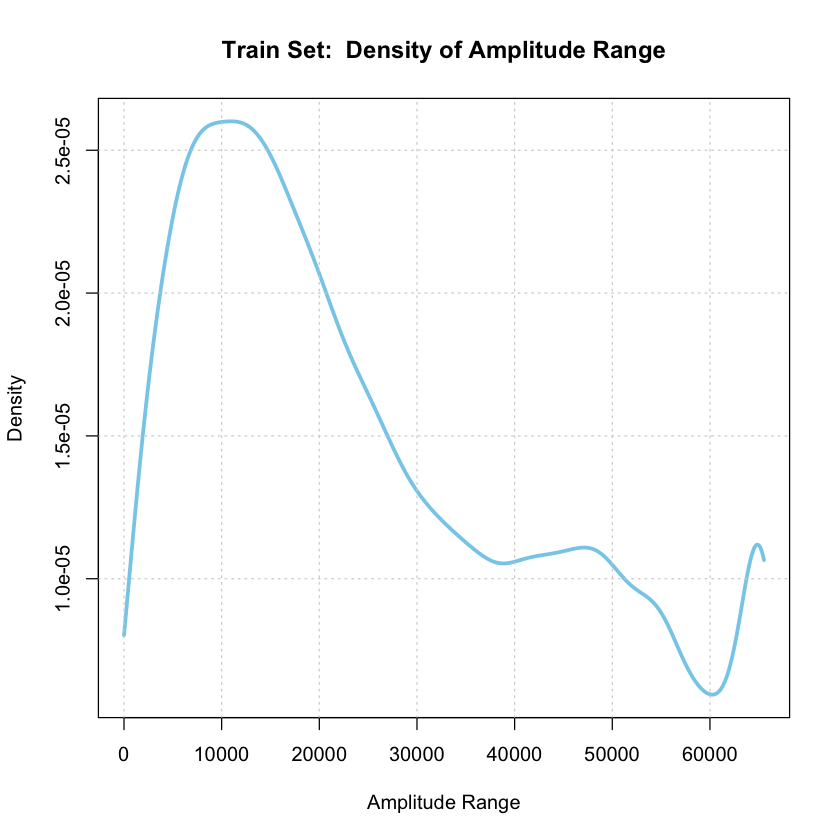

In [72]:
plot(density(trainInfo$range, from=min(trainInfo$range), to=max(trainInfo$range)),
             main="Train Set:  Density of Amplitude Range",
             xlab="Amplitude Range",
             lwd=3, col="skyblue")
grid()

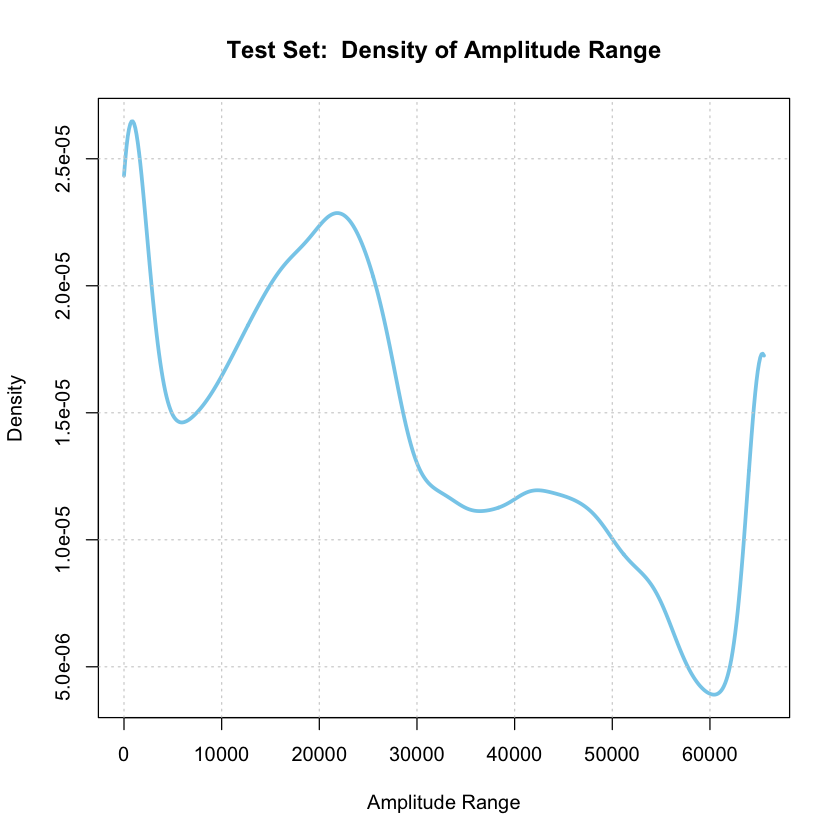

In [73]:
plot(density(testInfo$range, from=min(testInfo$range), to=max(testInfo$range)),
             main="Test Set:  Density of Amplitude Range",
             xlab="Amplitude Range",
             lwd=3, col="skyblue")
grid()

In [74]:
plotRangeQuantiles <- function(targetWord, trainInfo)
{
    wordSet <- trainInfo              %>% 
           filter(word == targetWord) %>%
           arrange(desc(min))               # rank order by minimum amplitude
    
    plot(wordSet$min, type="l",
         main=paste0("Amplitude Range Quantiles for '", targetWord, "' Utterances"),
         ylab="Amplitude",
         xlab="File Index",
         col="green",
         ylim=c(min(wordSet$min), max(wordSet$max)))
    lines(wordSet$Q10,    col="black")
    lines(wordSet$median, col="red")
    lines(wordSet$Q90,    col="gray")
    lines(wordSet$max,    col="blue")
    grid()
    legend("topleft",
           c("Q1.00 (max)", "Q0.90", "Q0.50 (median)", "Q0.10", "Q0.00 (min)"),
           col=c("blue", "gray", "red", "black", "green"),
           bty="n", lty="solid", lwd=2)   
}

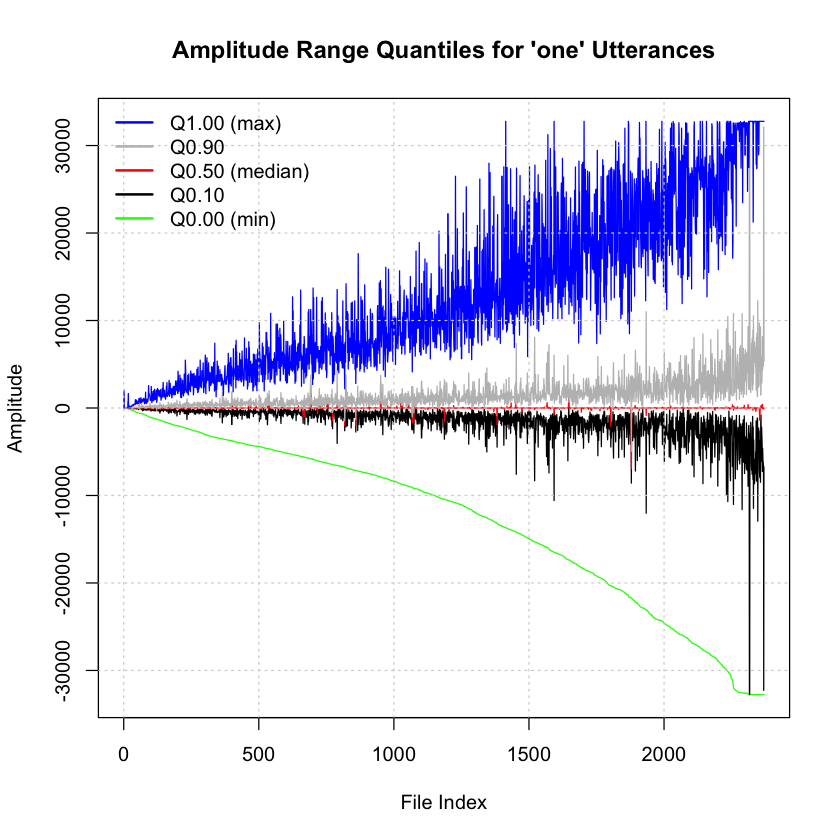

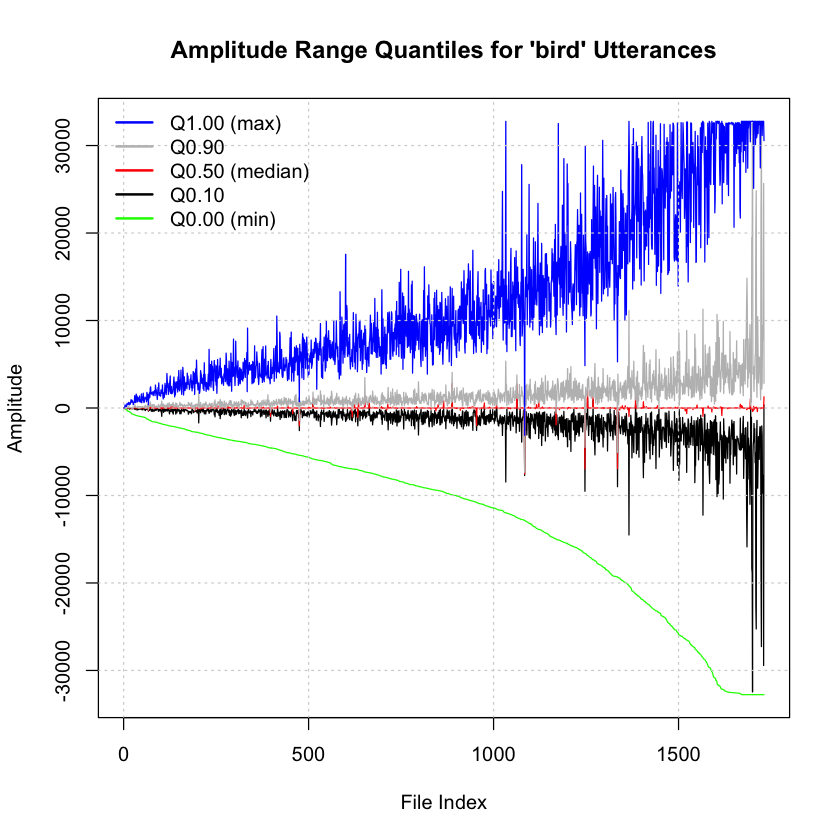

In [75]:
words <- c('one', 'bird')    

for (word in words)
{
  plotRangeQuantiles (word, trainInfo)
}